# Seattle Crash Severity Prediction Model 

## A. Introduction

A.1. Business Problem Description and Analysis

The Seattle SPOT Traffic Management Division 

A.2 Data Description

In [1]:
#Necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import sklearn


## Data Pre-Processing

In [8]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_3c8a1703615440cdbbf64d9325ea7d76 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='pXMV-6aBm66Fag_GWQdj6fcPWavNQI_n0BQpfqUiwBKp',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_3c8a1703615440cdbbf64d9325ea7d76.get_object(Bucket='courseracapstone-donotdelete-pr-cewlpmbnv7tqjf',Key='Data-Collisions (1).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Encapsulating necessary data for analysis

In [33]:

df_crash_data = df_data_1[['SEVERITYCODE','OBJECTID','X','Y','ROADCOND','LIGHTCOND','WEATHER']]
df_crash_data.head()

,SEVERITYCODE,OBJECTID,X,Y,ROADCOND,LIGHTCOND,WEATHER
0,2,1,-122.323148,47.703140,Wet,Daylight,Overcast
1,1,2,-122.347294,47.647172,Wet,Dark - Street Lights On,Raining
2,1,3,-122.334540,47.607871,Dry,Daylight,Overcast
3,1,4,-122.334803,47.604803,Dry,Daylight,Clear
4,2,5,-122.306426,47.545739,Wet,Daylight,Raining


## Next we check the distribution of data labels and explore which features are the most common

In [28]:
df_crash_data['SEVERITYCODE'].value_counts()


1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [29]:
df_crash_data['ROADCOND'].value_counts()


Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [31]:
df_crash_data['LIGHTCOND'].value_counts()


Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [32]:
df_crash_data['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

## Clear leaders in types of labels are appearing, but it would be better to visualise them 

### Using seaborn and matplotlib we can view a graphical distribution of the leading labels 

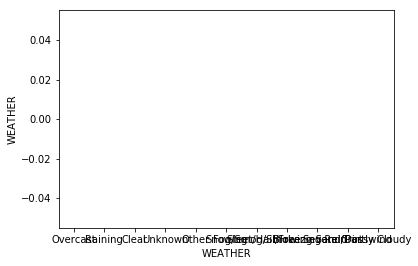

In [46]:
sns.barplot(x = df_crash_data['WEATHER'], y= df_crash_data['WEATHER'].value_counts())